#  Unit 7 | Assignment - News Mood
create a Python script to perform a sentiment analysis of the Twitter activity of various news outlets, and to present your findings visually.

# Observations:
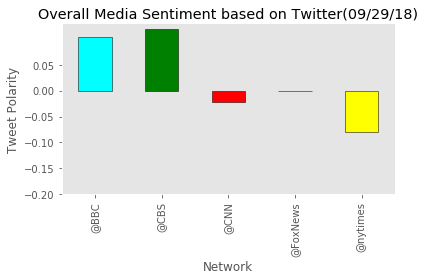
According to the scatter chart the sentiments response for all tweets for @BBC','@CBS','@CNN','@FoxNews','@nytimes':
    - there are more responses from 0-1.0 for positive sentiments.
    - NY Times(yellow) have the most 0 responses from sentiment analysis.
    
VADER Average Sentiment Analysis Table    


Network	Average Compound Score	Average Positive Score	Average Neutral Score	Average Negative Score
0   @BBC         0.103	0.098	0.059	0.843
1	@CBS	     0.120	0.082	0.032	0.886
2	@CNN	    -0.022	0.069	0.074	0.857
3	@FoxNews	-0.001	0.095	0.103	0.801
4	@nytimes	-0.079	0.064	0.097	0.839

    - Vader Analysis did not like twitter news from CNN, FoxNews and Nytimes. Their average compound scores are -0.022(CNN),
       -0.001(FoxNews) and -.0.079(NyTimes).
    - Top Average positive score are CBS(.886), CNN(.857) and BBC(.843)
    
Overall Media Sentiment based on Twitter(mm/dd/yy) bar graph
    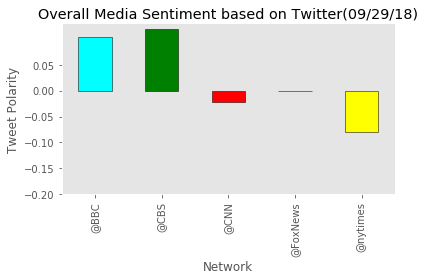
     - Nytimes has the most negative sentiment score according to bar graph.
     - CBS has the best postive sentiment score. 


In [1]:
# tweepy, pandas, matplotlib, and VADER Dependencies
# Dependencies
%matplotlib inline
import tweepy
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style


from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from config import consumer_key, consumer_secret, access_token, access_token_secret


In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Pull 100 Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.
networks=['@BBC','@CBS','@CNN','@FoxNews','@nytimes']

# Variables for holding sentiments
sentiments = []

# Loop through each network
for network in networks:
   
    # Counter
    network_counter = 1
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        # Get all tweets from home feed
        public_tweets = api.user_timeline(network,page=x)
        # Loop through all tweets
        for tweet in public_tweets:
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
       
            # Add sentiments for each tweet into a li
            sentiments.append({"Network": network,
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Text": tweet["text"],
                               "Tweets Ago": network_counter})
            # network counter,
            network_counter += 1


In [4]:
# Create Network DataFrame from Results List
sentiments_df = pd.DataFrame(sentiments)
sentiments_df.head()

,Compound,Date,Negative,Network,Neutral,Positive,Text,Tweets Ago
0,-0.7003,Sat Sep 29 16:01:07 +0000 2018,0.707,@BBC,0.293,0.000,'My children bought back the car I sold to pay...,1
1,0.5499,Sat Sep 29 15:54:38 +0000 2018,0.871,@BBC,0.000,0.129,RT @BBCEngland: Benny the beluga whale is spen...,2
2,0.7088,Sat Sep 29 15:02:04 +0000 2018,0.671,@BBC,0.000,0.329,Always start by playing paper! 👊✋✌️\n\nThis is...,3
3,0.0000,Sat Sep 29 14:03:07 +0000 2018,1.000,@BBC,0.000,0.000,'What do I know her from again?' 🤔📺\n\nThese a...,4
4,-0.5256,Sat Sep 29 13:01:07 +0000 2018,0.747,@BBC,0.253,0.000,This is the world's most dangerous city to be ...,5


In [5]:
# Export the data in the DataFrame into a CSV file.
sentiments_df.to_csv("Output/Networks_Sentiment_Results.csv")

In [6]:
# Calculate Vader Sentiments average for compound, negative positive and neutral

average_compound_score = round(sentiments_df.groupby('Network')['Compound'].mean(),3)
average_positive_score = round(sentiments_df.groupby('Network')['Positive'].mean(),3)
average_neutral_score = round(sentiments_df.groupby('Network')['Neutral'].mean(),3)
average_negative_score = round(sentiments_df.groupby('Network')['Negative'].mean(),3)


# Perform a Vader sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet.
vader_network_results = {
                         "Average Compound Score": average_compound_score,
                         "Average Positive Score": average_positive_score ,
                         "Average Neutral Score": average_neutral_score,
                         "Average Negative Score": average_negative_score
                        }

In [1]:
# Create Vader DataFrame from Results List
vader_network_results_df = pd.DataFrame(vader_network_results).reset_index()
vader_network_results_df

NameError: name 'pd' is not defined

In [8]:
# Export the data in the DataFrame into a CSV file
vader_network_results_df.to_csv("Output/Vader_Network_Results.csv")

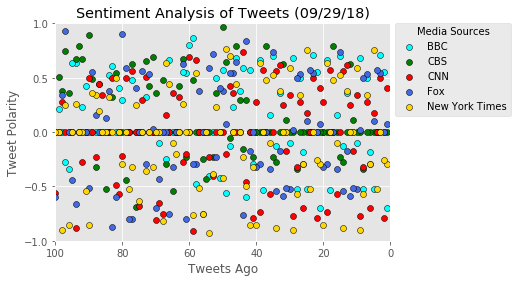

<Figure size 432x288 with 0 Axes>

In [9]:
# Scatter chart Sentiment Analysis of Media Tweets(mm/dd/yy)
# Each plot point will reflect the COMPOUND sentiment each tweet per network.
# Sort each plot point by its relative timestamp.
plt.figure(figsize=(6,4))
style.use('ggplot')
    
# BBC scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Network"]== '@BBC']
y_axis = sentiments_df["Compound"][sentiments_df["Network"] == '@BBC']
plt.scatter(x_axis, y_axis, marker="o", facecolors="cyan", label="BBC", edgecolors="black",
            linewidth=0.5, alpha=0.9999)
# CBS scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Network"]== '@CBS']
y_axis = sentiments_df["Compound"][sentiments_df["Network"] == '@CBS']
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", label="CBS", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

# CNN scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Network"]== '@CNN']
y_axis = sentiments_df["Compound"][sentiments_df["Network"] == '@CNN']
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", label="CNN", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

# FOX scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Network"]== '@FoxNews']
y_axis = sentiments_df["Compound"][sentiments_df["Network"] == '@FoxNews']
plt.scatter(x_axis, y_axis, marker="o", facecolors="royalblue", label="Fox", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

# New York Times scatterplot
x_axis = sentiments_df["Tweets Ago"][sentiments_df["Network"]== '@nytimes']
y_axis = sentiments_df["Compound"][sentiments_df["Network"] == '@nytimes']
plt.scatter(x_axis, y_axis, marker="o", facecolors="gold", label="New York Times", edgecolors="black",
            linewidth=0.5, alpha=0.9999)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f"Sentiment Analysis of Tweets ({now})") 
plt.legend(title="Media Sources",bbox_to_anchor=(.9,.9),bbox_transform=plt.gcf().transFigure)
plt.xlim(100,0)
plt.ylim(-1.0,1.0)
plt.yticks([-1,-0.5,0,0.5,1])
plt.grid(which='major', color='white')
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.savefig("Output/sentiment_scatter.png")

plt.show()
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

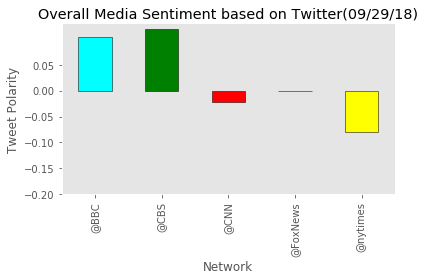

In [10]:
# Overall Media Sentiment based on Twitter(mm/dd/yy)
# x-axis - news network
# y-axis - Tweety polarity (-.20-.05)
plt.figure(figsize=(6,4))

vader_network_results_df.plot('Network', 'Average Compound Score', linewidth= .5, kind='bar',
                              color=['cyan','green','red','royalblue','yellow'],legend=False,
                              edgecolor="black", alpha=0.9999)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m/%d/%y")
plt.title(f"Overall Media Sentiment based on Twitter({now})") 
#plt.ylim(-.20,.05)
plt.yticks([-0.20,-0.15,-.10,-0.05,0.00,0.05])
plt.grid(which='major')
plt.ylabel("Tweet Polarity")

# Save chart to png
plt.savefig("Output/sentiment_bar.png")

plt.tight_layout()
plt.show()